Teoría de elementos finitos y su implementación (11/12/2018)
===
## La función help

In [1]:
set = ["min" "max" "mean"];
for i = 1:3
    help( set(i) )
end

 MIN    Smallest component.
    For vectors, MIN(X) is the smallest element in X. For matrices,
    MIN(X) is a row vector containing the minimum element from each
    column. For N-D arrays, MIN(X) operates along the first
    non-singleton dimension.
 
    [Y,I] = MIN(X) returns the indices of the minimum values in vector I.
    If the values along the first non-singleton dimension contain more
    than one minimal element, the index of the first one is returned.
 
    MIN(X,Y) returns an array with the smallest elements taken from X or Y.
    X and Y must have compatible sizes. In the simplest cases, they can be
    the same size or one can be a scalar. Two inputs have compatible sizes
    if, for every dimension, the dimension sizes of the inputs are either
    the same or one of them is 1.
 
    MIN(X,[],'all') returns the smallest element of X.
 
    [Y,I] = MIN(X,[],DIM) operates along the dimension DIM.
 
    MIN(X,[],VECDIM) operates on the dimensions specified in the vector 


In [2]:
a = [2, 3, 4, 7, -4, 3];
fprintf('El valor mínimo y máximo de a es: %i.\n', min(a) );
fprintf('El valor mínimo de a es %i.\n', max(a) );
fprintf('El valor promedio de a es %1.0f.\n', mean(a) );
fprintf('La longitud de a es %i.', length(a) );

El valor mínimo y máximo de a es: -4.
El valor mínimo de a es 7.
El valor promedio de a es 2.
La longitud de a es 6.

## Solución de sistemas de ecuaciones lineales

**Ejemplo:** Encontrar la solución del siguiente sistema lineal

$$\begin{alignat}{9}
2x_1&&\; + \;&& 6x_2   &&\; + \;&& 7x_3  &&\; + \;&& 9x_4 &&\; = \;&& 2 & \\
3x_1 &&\; + \;&& 7x_2  &&\; + \;&& 2x_3 &&\; + \;&& 5x_4 &&\; = \;&& -1 & \\
4x_1 &&\; - \;&& 2x_2  &&\; + \;&& x_3  &&\; + \;&& 6x_4 &&\; = \;&& 3 & \\
x_1&&\; + \;&&  9x_2   &&\; + \;&& 8x_3 &&\; + \;&& 2x_4 &&\; = \;&& 4 & \\
\end{alignat}$$

Forma matricial
$$Ax=b \implies x=A^{-1}b.$$
donde

In [3]:
A =[2 6 7 9
    3 7 2 5
    4 -2 1 6
    1 9 8 2];
b =[2 -1 3 4]';
x = A\b % Multiplicación por la izquierda


x =

    0.9557
   -0.5123
    1.0788
   -0.4877



Verificando el resultado anterior:

In [4]:
A*x-b
norm(A*x-b) % El valor de la norma debe tender a 0.


ans =

   1.0e-14 *

    0.0444
   -0.1776
         0
         0


ans =

   1.8310e-15



In [5]:
help norm

 NORM   Matrix or vector norm.
      NORM(X,2) returns the 2-norm of X.
 
      NORM(X) is the same as NORM(X,2).
 
      NORM(X,1) returns the 1-norm of X.
 
      NORM(X,Inf) returns the infinity norm of X.
 
      NORM(X,'fro') returns the Frobenius norm of X.
 
    In addition, for vectors...
 
      NORM(V,P) returns the p-norm of V defined as SUM(ABS(V).^P)^(1/P).
 
      NORM(V,Inf) returns the largest element of ABS(V).
 
      NORM(V,-Inf) returns the smallest element of ABS(V).
 
    By convention, NaN is returned if X or V contains NaNs.
 
    See also COND, RCOND, CONDEST, NORMEST, HYPOT.

    Reference page in Doc Center
       doc norm

    Other functions named norm

       codistributed/norm    DynamicSystem/norm    mfilt/norm    tall/norm
       dfilt/norm            gpuArray/norm         sym/norm



## Gráficas con MATLAB

In [6]:
help plot

 PLOT   Linear plot. 
    PLOT(X,Y) plots vector Y versus vector X. If X or Y is a matrix,
    then the vector is plotted versus the rows or columns of the matrix,
    whichever line up.  If X is a scalar and Y is a vector, disconnected
    line objects are created and plotted as discrete points vertically at
    X.
 
    PLOT(Y) plots the columns of Y versus their index.
    If Y is complex, PLOT(Y) is equivalent to PLOT(real(Y),imag(Y)).
    In all other uses of PLOT, the imaginary part is ignored.
 
    Various line types, plot symbols and colors may be obtained with
    PLOT(X,Y,S) where S is a character string made from one element
    from any or all the following 3 columns:
 
           b     blue          .     point              -     solid
           g     green         o     circle             :     dotted
           r     red           x     x-mark             -.    dashdot 
           c     cyan          +     plus               --    dashed   
           m     magenta    

Comando `plot`:

Sintáxis: `plot(X, Y)`

Plotea el vector `Y` vs el vector `X`.

Si `X` o `Y` es una matriz, entonces el vector es ploteado vs las filas o columnas de la matriz, dependiendo si el vector es fila o columna.

Ejercicio: Grafique $f(t)=t\mathrm{sen}t\,,0\le t\le 6$.

Ejemplo: Para graficar las funciones:
$$f(t)=t\mathrm{sen}t\,,0\le t\le 6, \text{ y } g(t)=t^2,0\le t\le 6.$$

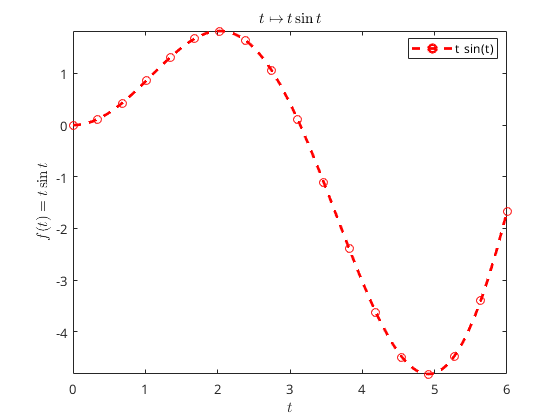

In [7]:
syms t
I = [0 6];
fplot( @(t) t.*sin(t), I, '--or', 'Linewidth', 2 );
xlabel('$t$','Interpreter','latex'); ylabel('$f(t)=t\sin t$','Interpreter','latex');
legend('show','Location','best'); title('$t\mapsto t\sin t$','Interpreter','latex');

Lo mismo se obtiene si se escribe

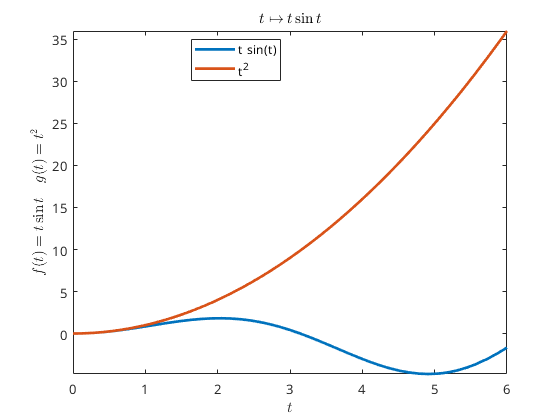

In [8]:
syms t
fplot( @(t) t.* sin(t), I, 'Linewidth', 2 );
hold on 
fplot( @(t) t.^2, I, 'Linewidth', 2 );
xlabel('$t$','Interpreter','latex'); ylabel('$f(t)=t\sin t\quad g(t)=t^2$','Interpreter','latex');
legend('show','Location','best'); title('$t\mapsto t\sin t$','Interpreter','latex');
hold off

Sintáxis plot (`X,Y,S`)
S es un carácter o cadena (string) compuesto de uno o de todos los elementos de las siguientes tres columnas:

| Color | Tipo de marca | Tipo de línea |
|:-----:|:-------------:|:-------------:|
|`y` yellow|`.` punto|`-` línea continua|
|`m` magenta|`o` círculo | `:` línea punteada|
|`c` cyan|`x` marca-x|`-.` línea raya-punto.|
|`r` red| `+` más| `--` línea rayada|
|`g` green|`*` estrella|
|`b` blue| `s` cuadrado||
|`w` white|`d` diamante||
|`k` black|`.` triángulo (abajo)||
||`^` triángulo (arriba)||
||`<` triángulo (izquierdo)||
||`>` triángulo (derecho)||
||`p` estrella de 5 puntas||
||`h` estrella de 6 puntas||

Ejemplo: Graficar $g(x)=x\exp(x)$, $-3\le x\le 5$.

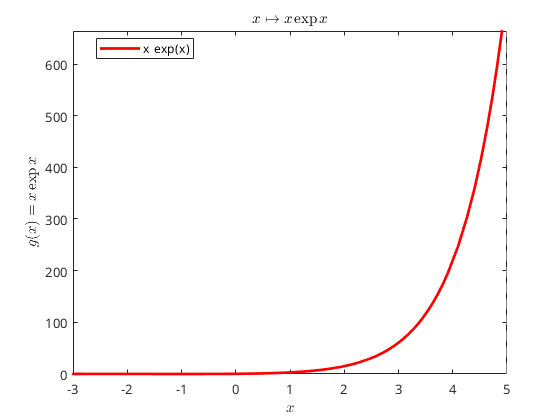

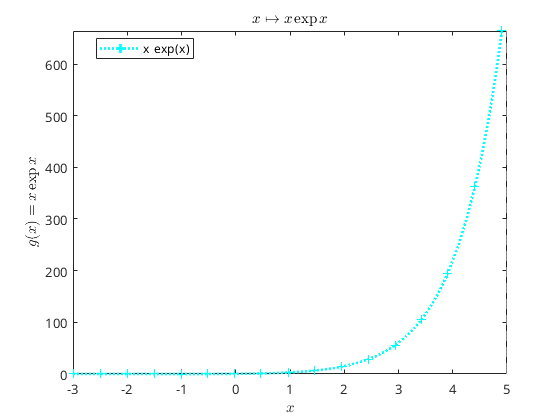

In [9]:
syms x
fplot( @(x) x.*exp(x), [-3 5], 'c+:', 'Linewidth', 2);
xlabel('$x$','Interpreter','latex'); ylabel('$g(x)=x\exp x$','Interpreter','latex');
legend('show','Location','best'); title('$x\mapsto x\exp x$','Interpreter','latex');
figure % Crea una nueva ventana.
fplot( @(x) x.*exp(x), [-3 5], 'r.-', 'Linewidth', 2);
xlabel('$x$','Interpreter','latex'); ylabel('$g(x)=x\exp x$','Interpreter','latex');
legend('show','Location','best'); title('$x\mapsto x\exp x$','Interpreter','latex');

`plot(X1,Y1,S1,X2,Y2,S2,X3,Y3,S3,...)`
combina las gráficas definidas por las ternas $\left(X_k,Y_k,S_k\right)$.

Ejemplo: Graficar las funciones
$$
\begin{align*}
f(x)&=x\mathrm{sen}x,&0\le x\le6,\\
g(x)&=x^2,&1\le x\le5.
\end{align*}
$$

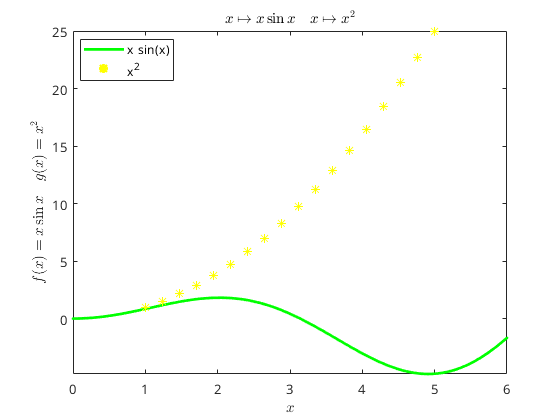

In [10]:
syms x
fplot( @(x) x.*sin(x), [0 6], 'g.-', 'Linewidth', 2);
hold on
fplot( @(x) x.^2, [1 5], 'y*', 'Linewidth', 2);
xlabel('$x$','Interpreter','latex'); ylabel('$f(x)=x\sin x\quad g(x)=x^2$','Interpreter','latex');
legend('show','Location','best'); title('$x\mapsto x\sin x\quad x\mapsto x^2$','Interpreter','latex');
hold off

Para etiquetar los ejes:

`xlabel(texto) adiciona el texto junto al eje X`

`ylabel(texto) adiciona el texto junto al eje Y`

Para colocar un título a un gráfico:

`Title (texto)`

adiciona texto como título en la parte superior.

Para anotar un texto:

`text(X,Y,'string')`

adiciona el texto entre comillas en la posición `(X,Y)` donde las unidades son las usadas actualmente.

Ejemplo: Para graficar las funciones $$ f(x)=x\cos x,\quad -3\le x\le4.$$

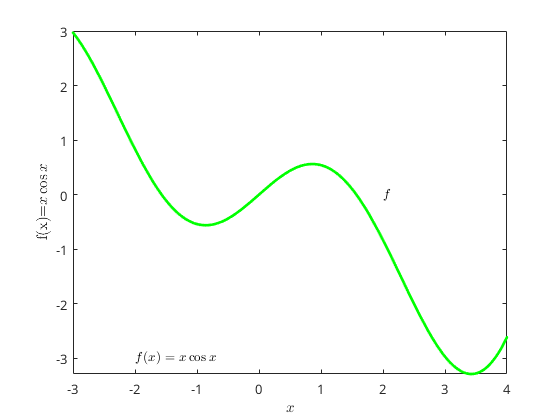

In [11]:
syms x
fplot( @(x) x.*cos(x), [-3 4], 'g.-', 'Linewidth', 2);
xlabel('$x$','Interpreter','latex'); ylabel('f(x)=$x\cos x$','Interpreter','latex');
text(2,0,'$f$','Interpreter','latex'); text(-2,-3,'$f(x)=x\cos x$','Interpreter','latex');

`grid on`: para agregar una retícula a la gráfica.

`grid off`: para desactivar (eliminar) la retícula de la gráfica.

`grid on`: Se puede redibujar una figura en forma cuadrada con:

`axis('square')`: Los ejes coordenados y las marcas de escala pueden omitirse con:

`axis('off')`: Este efecto se cancela con `axis('on')`

El máximo y el mínimo de las coordenadas en la gráfica se pueden representar con:

`axis([x_min, x_max, y_min, y_max])`.

`legend('cadena1','cadena2',etc)`

Le permite agregar una leyenda a su gráfica. La leyenda muestra un mdoelo de la línea y menciona la cadena que especificó.

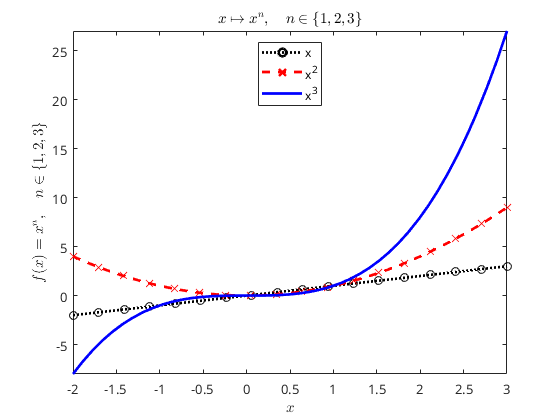

In [12]:
syms x
I = [-2 3]; colors = [":ok", "--xr", "-b"];
for i = 1:3
    fplot( @(x) x.^i, I, colors(i), 'Linewidth', 2);
    hold on
end
xlabel('$x$','Interpreter','latex'); ylabel('$f(x)=x^n,\quad n\in\{1,2,3\}$','Interpreter','latex');
legend('x','x^2','x^3','Location','best'); title('$x\mapsto x^n,\quad n\in\{1,2,3\}$','Interpreter','latex');
hold off

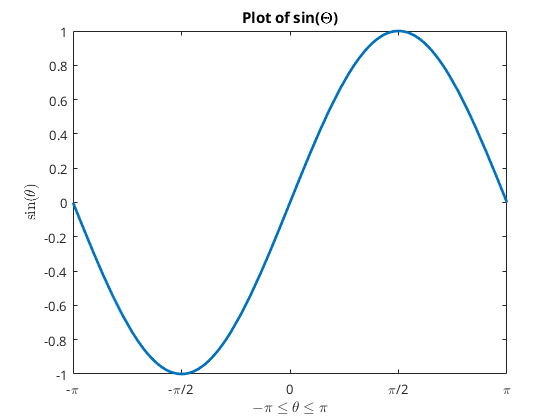

In [13]:
% https://www.mathworks.com/help/matlab/creating_plots/change-tick-marks-and-tick-labels-of-graph-1.html
fplot( @(x) sin(x), [-pi pi], 'Linewidth', 2);
xticks(-pi:pi/2:pi)
xticklabels({'-\pi', '-\pi/2', '0', '\pi/2', '\pi'})
xlabel('$-\pi\le\theta\le\pi$','Interpreter','latex');
ylabel('$\sin(\theta)$','Interpreter','latex');
title('Plot of sin(\Theta)');

El objetivo de los métodos numéricos es hallar soluciones de ecuaciones desconocidas a
Implementar la matriz de Vandermonde en MATLAB.

In [14]:
help figure

 FIGURE Create figure window.
    FIGURE, by itself, creates a new figure window, and returns
    its handle.
  
    FIGURE(H) makes H the current figure, forces it to become visible,
    and raises it above all other figures on the screen.  If Figure H
    does not exist, and H is an integer, a new figure is created with
    handle H.
 
    GCF returns the handle to the current figure.
 
    Execute GET(H) to see a list of figure properties and
    their current values. Execute SET(H) to see a list of figure
    properties and their possible values.
 
    See also SUBPLOT, AXES, GCF, CLF.

    Reference page in Doc Center
       doc figure


